# Algorytm Karpa-Millera-Rosenberga

Algorytm Karpa-Millera-Rosenberga (KMR) polega na znajdowaniu słownika podsłów bazowych i na tej podstawie rozwiązywaniu problemów tekstowych, np. znajdowaniu powtarzających się składowych w tekście.\
Aby przejść do wyjaśnienia Algorytmu KMR należy wyjaśnić czym jest slownik podsłów bazowych, a wtym celu należy zrozumieć takie pojęcia jak: numerowanie tekstu, r-ekwiwalencja, tablica podsłów i tablica odesłań.

### Spis treści

__1. Numerowanie / etykietowanie tekstu <br>
2. r-ekwiwalencja<br>
3. Tablica etykiet<br>
4. Tablica odesłań<br>
5. Funkcja $renumber$<br>
6. Słownik podstawowych składowych<br>
7. Implementacja i złożoność algorytmu KMR<br>
8. Składowe o długościach innych niż potęgi dwójki<br>
9. Wykorzystanie algorytmu KMR<br>
10. Bibliografia__

### 1. Numerowanie / etykietowanie tekstu (ang. numbering / naming)

Mamy daną długość $r$. W danym tekście $text$ jest $k$ unikalnych składowych o długości $r$. \
Niech $fac(1), fac(2), ... fac(k)$ będzie sekwencją tych składowych w kolejności leksykograficznej.\
Numerowanie ciągu polega na stworzeniu wektora $NUMr$, takiego, że:\
\
$NUMr[i]=j$ jeżeli $text[i:i+r-1]=fac(j)$\
\
czyli:\
Jeżeli na pozycji i-tej w tekście zaczyna się składowa $fac(j)$ to $NUMr[i]=j$

#### Przykład 1

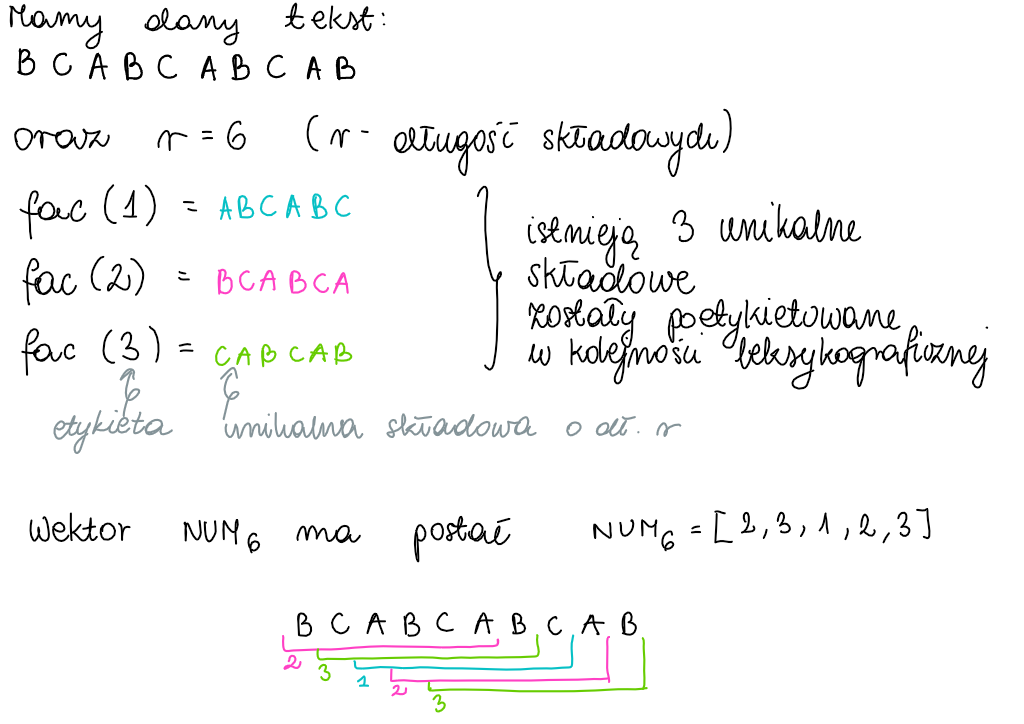

### 2. r - ekwiwalencja

Dwie pozycje $i$ i $j$ są r-ekwiwalentne  gdy $NUMr[i]=NUMr[j]$, czyli składowe o długości $r$ zaczynające się na pozycjach $i$ i $j$ są takie same.

#### Przykład 2

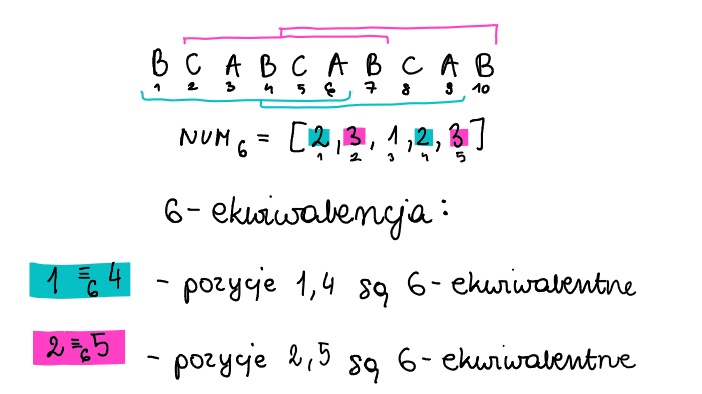

### 3. Tablica etykiet

Tablicą etykiet nazywany jest wektor $NUMr$ dla dowolnego $r\in N$

### 4. Tablica odesłań

Tablica odesłań to wektor, który dla każdej etykiety unikalnej składowej zawiera odesłanie do dowolnego wystąpienia w tekście. Co istotne jeżeli w tekście co najmniej jedna składowa występuje co najmniej 2 razy, to istnieje więcej niż jedna tablica odesłań. \
Oznaczenie: $POSr$, gdzie $r$ to długość składowej

#### Przykład 3

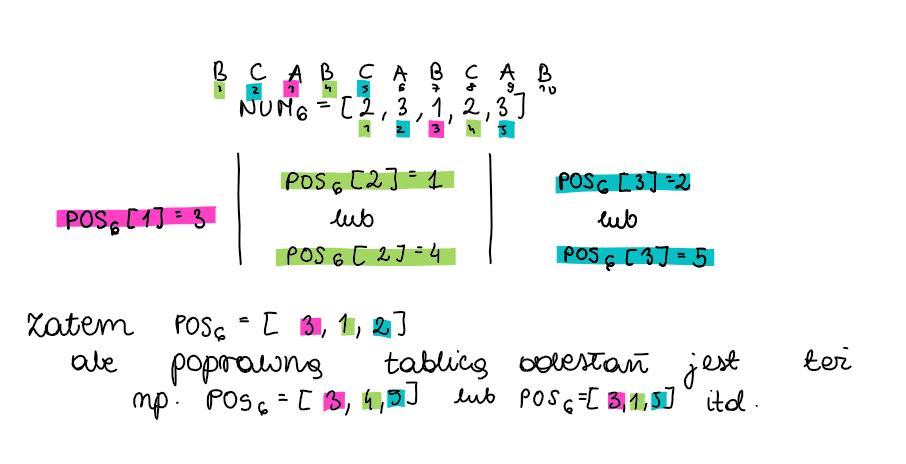

### 5. Funkcja $renumber$ 

Funkcja $renumber$ to podstawowy krok w algorytmie Karpa-Millera-Rosenberga (KMR). \
Opiera się na podstawowej własności: podciąg dwuelementowy może być jednoznacznie reprezentowany przez dwie etykiety podciągów jednoelementowych. Analogicznie podciąg czteroelementowy - może być jednoznacznie reprezentowany przez dwie etykiety podciągów dwuelementowych. Itd. dla wszystkich podciągów o długości będącej potęgą dwójki.\
Wyżej opisany fakt można zapisać również w następujący sposób:\
\
$NUM2r[i]=NUM2r[j]$ jeżeli $NUMr[i]=NUMr[j]$ oraz $NUMr[i+r]=NUMr[j+r]$

#### Przykład 4

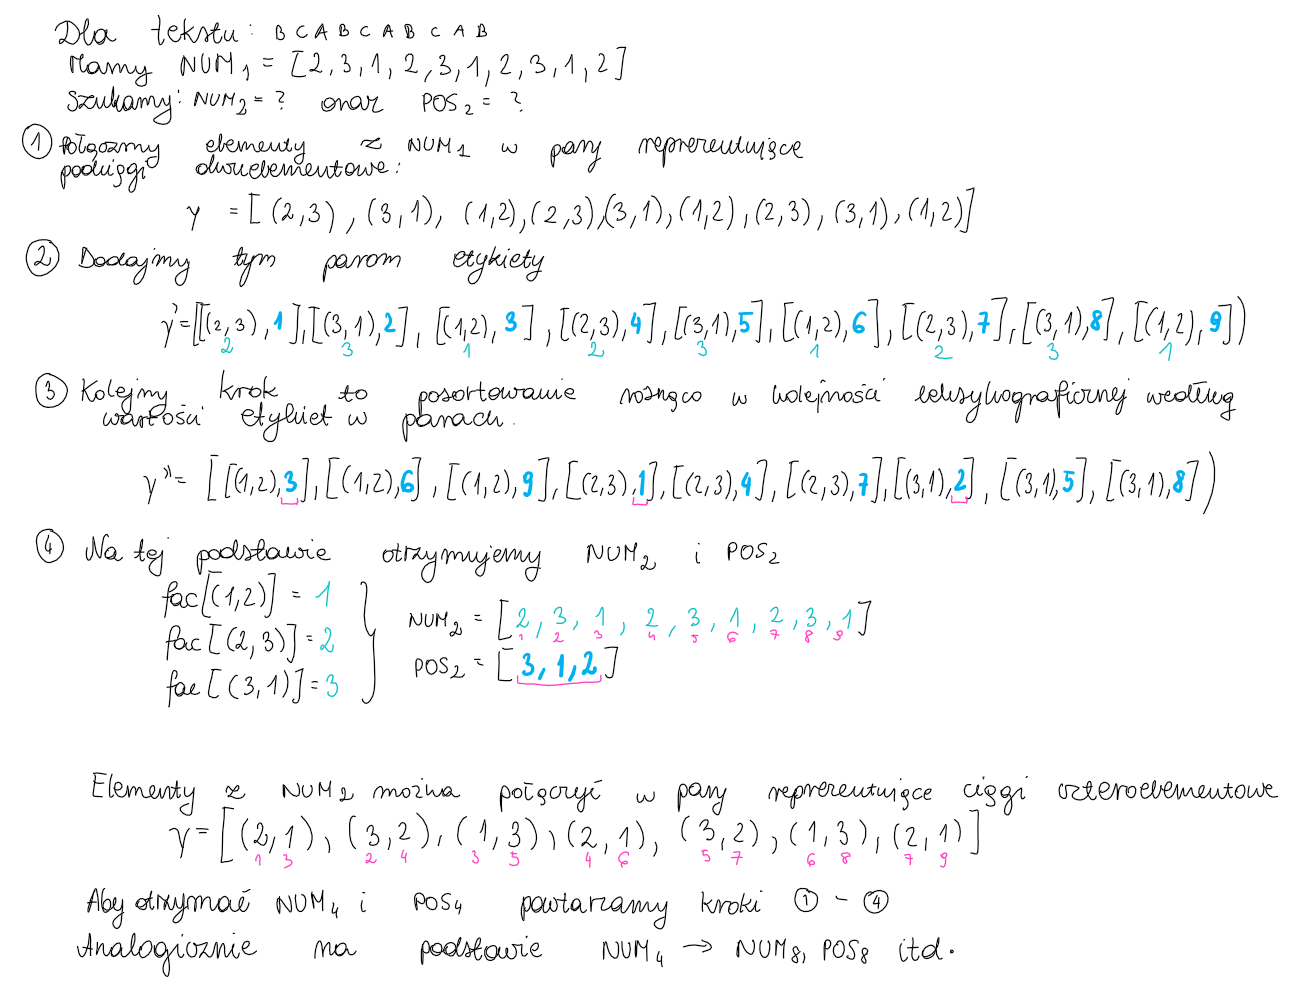

Aby znaleźć wektor NUM1 i POS1 można potraktować tekst jako wektor y i wykonać na nim kroki 2-4.

#### Implementacja

Jako argument funkcja renumber przyjmuje wektor i wykonuje kroki 2-4.

In [2]:
def renumber(vec):
    vec_idx=[(elem, i) for i, elem in enumerate(vec)] #KROK 2
    vec_idx.sort() #KROK 3
    label=-1
    num=[-1 for _ in vec]
    pos=[]
    for i, elem in enumerate(vec_idx): #KROK 4
        if i==0 or vec_idx[i-1][0]!=elem[0]:
            label+=1
            pos.append(elem[1])
        num[elem[1]]=label
    return num, pos

#### Złożoność obliczeniowa

Złożoność funkcji $renumber$ jest taka sama jak złożoność sortowania zastosowanego w kroku 3, ponieważ złożoność kroków 2 i 4 jest liniowa. W powyższej implementacji zastosowano funkcję wbudowaną o złożoności $O(n*log(n))$, ale można zastosować sortowanie przez zliczanie, gdyż wartości są ograniczone. W związku z tym funkcja $renumber$ może mieć złożoność $O(n)$.

### 6. Słownik podstawowych składowych

Tablice etykiet $NUMr$ i odesłań $POSr$  dla $r$ będących kolejnymi potęgami dwójki niewiększymi od długości zadanego tekstu $text$ nazywamy słownikiem podstawowych składowych. \
Oznaczenie: $DBF(text)$ (dictionary od basic factors)

### 7. Implementacja i złożoność algorytmu KMR

Algorytm KMR polega na znalezieniu słownika podstawowych składowych dla danego tekstu. Na podstawie DBF można otrzymać dużo informacji o tekście.

#### Implementacja

W poniższej implementacji argument funkcji $r$ to maksymalna długość składowych, dla których szukamy tablic ektykiet i odesłań. $r$ nie może być większe niż długość tekstu.

In [15]:
def KMR(text, r):
    if r>len(text): return None
    num1, pos1=renumber(text) #Znalezienie NUM1
    nump=num1
    p=1
    nums={1:num1} #Definicja KBF
    poss={1:pos1}
    while 2*p<r:
        y=[(nump[i], nump[i+p]) for i in range (len(nump)-p)] #KROK 1 z przykładu 4
        p*=2
        nump, posp=renumber(y)
        nums[p]=nump.copy() #uzupełnienie KBF
        poss[p]=posp.copy()     
        
    return nums, poss

#### Przykład 5

In [17]:
text="CABCABCABCAB"
r=len(text)
print(f"text: {text}")
nums, poss=KMR(text,r)
for i in nums.keys(): 
    print(f"NUM{i}: {nums[i]}")
    print(f"POS{i}: {poss[i]}")
    print(f"STRINGS: {[text[pos1:pos1+2**i] for pos1 in poss[i]]}")
    print()

text: CABCABCABCAB
NUM1: [2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1]
POS1: [1, 2, 0]
STRINGS: ['AB', 'BC', 'CA']

NUM2: [2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0]
POS2: [1, 2, 0]
STRINGS: ['ABCA', 'BCAB', 'CABC']

NUM4: [2, 0, 1, 2, 0, 1, 2, 0, 1]
POS4: [1, 2, 0]
STRINGS: ['ABCABCABCAB', 'BCABCABCAB', 'CABCABCABCAB']

NUM8: [2, 0, 1, 2, 0]
POS8: [1, 2, 0]
STRINGS: ['ABCABCABCAB', 'BCABCABCAB', 'CABCABCABCAB']



#### Złożoność obliczeniowa

Jeżeli wykorzystujemy funkcję $renumber$ o złożoności liniowej (z liniowym sortowaniem), to złożoność algorytmu KMR jest $O(n*log(n))$

### 8. Składowe o długościach innych niż potęgi dwójki

Aby rozwiązać problemy dla składowych o długościach $q$ innych niż potęgi dwójki wystarczy skorzystać z faktu:\
\
$NUMq[i]=NUMq[j]$ jeżeli $NUMt[i]=NUMt[j]$ oraz $NUMr[i+q-t]=NUMr[j+q-t]$\
gdzie: $t=max\{r:r=2^i, r<q\}$\
\
To oznacza, że $NUMq$ można znaleźć na podstawie tablicy etykiet dla największej liczby będącej potęgą dwójki niewiększej od $q$.

### 9. Wykorzystanie algorytmu KMR

DBF uzyskane w wyniku algorytmu KMR można wykorzystać na wiele sposobów: <br>
9.1. Wyszukiwanie wzorca<br>
9.2. Poszukiwanie powtarzających się składowych o długości $r$.<br>
9.3. Poszukiwanie najdłuższej skladowej występującej co najmniej $k$ razy w tekście.<br>
9.4. Poszukiwanie najdłuższego powtarzającego się wzorca dwuwymiarowego.

#### 9.1. Wyszukiwanie wzorca

Mamy dany tekst $text$ i wzorzec $pattern$. <br>
Aby znaleźć wszystkie wystąpienia wzorca w tekście należy stworzyć tekst postaci $text$#$pattern$, gdzie # to dowolny znak niewystępujący w tekście ani we wzorcu.  <br>
Następnie szukamy $NUMr$, gdzie $r$ to długość wzorca.  <br>
$NUMr[len(NUMr)]$ to etykieta wzorca.  <br>
Wszystkie pozycje na których znajduje się ta etykieta w $NUMr$ to pozycje w tekście, na ktorych znajduje się szukany wzorzec.  <br>
W ten sposób dodając na końcu tekstu kilka wzorców można stworzyć algorytm wyszukujący kilka wzorców jednocześnie.

#### 9.2. Poszukiwanie powtarzających się składowych o długości $r$ 

Mając słownik podsłów to zadanie jest trywialne, gdyż wszystkie potrzebne informacje znajdują się w $NUMr$ i $POSr$.

#### 9.3. Poszukiwanie najdłuższej skladowej występującej co najmniej $k$ razy w tekście

Aby zrealizować to zadanie należy skorzystać z faktu, że dwie pozycje są r-ekwiwalentne wtedy i tylko wtedy, gdy pozycje te są też n-ekwiwalentne dla każdego $n<r$. To znaczy, że jeżeli dla danej długości $n$ w ciągu nie ma co najmniej $k$ składowych o długości $n$, to nie ma też dłuższych składowych o takiej lub większej liczbie powtórzeń. <br>
Po przyswojeniu tego faktu można dojść do wniosku, że aby znaleźć najdłuższą składową występującą co najmniej $k$ razy w tekście można zastosować przeszukiwanie binarne. <br>
Aby zoptymalizować działanie algorytmu, tworząc słownik podsłów można od razu szukać dla danej długości składowej o maksymalnej liczbie powtórzeń i tę liczbę. <br>
Wtedy czas realizacji zadania 9.2. to czas tworzenia słownika podsłów i wyszukiwania binarnego. Jeżeli nie wykonamy tej optymalizacji to w każdym kroku wyszukiwania binarnego musimy dodatkowo wykonać liniowe poszukiwanie maksymalnej liczby powtórzeń składowej. </br>
Mimo wszystko czas realizacji tego algorytmu to $O(n*log(n))$. Aby zrealizować to samo zadanie można również wykorzystać (bardziej skomplikowany) algorytm wykorzystujący drzewo suffixów działający w czasie liniowym.

#### 9.4. Poszukiwanie najdłuższego powtarzającego się wzorca dwuwymiarowego

Problem z punktu 9.3. można przenieść również do przestrzeni dwuwymiarowej. W problemie 2D wewnętrzne sortowanie leksykograficzne (w funkcji $renumber$) jest wykonywane na 4-elementowych krotkach. Algorytm KMR jest natomiast analogiczny jak w przypadku 1D. </br>
Złożoność czasowa tego algorytmu to $O(n^2 * log(n^2 ))$ dla tekstu o rozmiarze $nxn$.

### 10. Bibliografia

[1] M. Crochemore, W. Rytter, Text Algorithms, Oxford University Press 1994 <br>
[2] http://www.apohllo.pl/texts/tekstowe/KMR.pdf szczególnie w zakresie tłumaczenia angielskich nazw na polskie